In [42]:
import json
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import statsmodels.api as sm

# sns.set(style='darkgrid')

In [43]:

font_path='c:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(6,5)
plt.rcParams['axes.unicode_minus']=False

In [44]:
tpFileName='data/서울특별시_관광지입장정보_2011_2016.json'
jsonTP=json.loads(open(tpFileName,'r',encoding='utf-8').read())
tour_table=pd.DataFrame(jsonTP,columns=('yyyymm','resNm','ForNum'))
tour_table=tour_table.set_index('yyyymm')
tour_table

,resNm,ForNum
yyyymm,,
201101,창덕궁,14137
201101,운현궁,0
201101,경복궁,40224
201101,창경궁,697
201101,종묘,6837
...,...,...
201609,국립중앙박물관,12218
201609,덕수궁,25843
201609,서대문자연사박물관,0


In [45]:
resNm=tour_table.resNm.unique()
print(resNm)
print(len(resNm))

['창덕궁' '운현궁' '경복궁' '창경궁' '종묘' '국립중앙박물관' '서울역사박물관' '덕수궁' '서울시립미술관 본관'
 '태릉 ·  강릉 · 조선왕릉전시관' '서대문형무소역사관' '서대문자연사박물관' '트릭아이미술관' '헌릉ㆍ인릉' '선릉·정릉'
 '롯데월드']
16


In [46]:
fv_CfileName='data/중국(112)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_CfileName,'r').read())
china_table=pd.DataFrame(jsonFV,columns=('yyyymm','visit_cnt'))
china_table=china_table.rename(columns={'visit_cnt':"china"})
china_table=china_table.set_index('yyyymm')
china_table

,china
yyyymm,
201101,91252
201102,140571
201103,141457
201104,147680
201105,154066
...,...
201608,513275
201609,591242
201610,650174


In [47]:
fv_UfileName='data/미국(275)_해외방문객정보_2011_2016.json'
jsonFV2=json.loads(open(fv_UfileName,'r').read())
usa_table=pd.DataFrame(jsonFV2,columns=('yyyymm','visit_cnt'))
usa_table=usa_table.rename(columns={'visit_cnt':"usa"})
usa_table=usa_table.set_index('yyyymm')
usa_table

,usa
yyyymm,
201101,43065
201102,41077
201103,54610
201104,59616
201105,59780
...,...
201608,63522
201609,63793
201610,77878


In [48]:
fv_JfileName='data/일본(130)_해외방문객정보_2011_2016.json'
jsonFV3=json.loads(open(fv_JfileName,'r').read())
ja_table=pd.DataFrame(jsonFV3,columns=('yyyymm','visit_cnt'))
ja_table=ja_table.rename(columns={'visit_cnt':"japan"})
ja_table=ja_table.set_index('yyyymm')
ja_table

,japan
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
...,...
201608,148632
201609,157313
201610,180348


In [49]:
fv_table=pd.merge(china_table,ja_table,left_index=True,right_index=True)


In [50]:
fv_table=pd.merge(fv_table,usa_table,left_index=True, right_index=True)
fv_table

,china,japan,usa
yyyymm,,,
201101,91252,209184,43065
201102,140571,230362,41077
201103,141457,306126,54610
201104,147680,239075,59616
201105,154066,241695,59780
...,...,...,...
201608,513275,148632,63522
201609,591242,157313,63793
201610,650174,180348,77878


In [51]:
def setScatterGraph(tour_table, fv_table,tourpoint):
    tour=tour_table[tour_table['resNm']==tourpoint]
    merge_table=pd.merge(tour,fv_table,left_index=True,right_index=True)

    fig=plt.figure()
    fig.suptitle(tourpoint+" 상관관계 분석")
    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r1=merge_table.china.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r1))
    plt.scatter(list(merge_table.china), list(merge_table.ForNum), edgecolors='none', alpha=0.75)

    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r2=merge_table.japan.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r2))
    plt.scatter(list(merge_table.japan), list(merge_table.ForNum), edgecolors='none', alpha=0.75)

    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r3=merge_table.usa.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r3))
    plt.scatter(list(merge_table.usa), list(merge_table.ForNum), edgecolors='none', alpha=0.75)

    plt.show()
    return [tourpoint,r1,r2,r3]

In [52]:
name='홍길동'
age=10
weight=50.875432
s1='이름은 {}이고, 나이는 {}이며, 몸무게는 {:.3f}입니다.'.format(name,age,weight)
s2='이름은 %s이고, 나이는 %d이며, 몸무게는 %f입니다.'%(name,age,weight)
print(s1)
print(s2)

이름은 홍길동이고, 나이는 10이며, 몸무게는 50.875입니다.
이름은 홍길동이고, 나이는 10이며, 몸무게는 50.875432입니다.


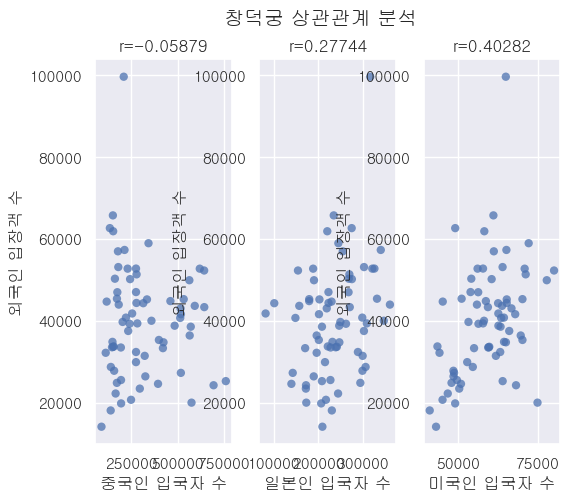

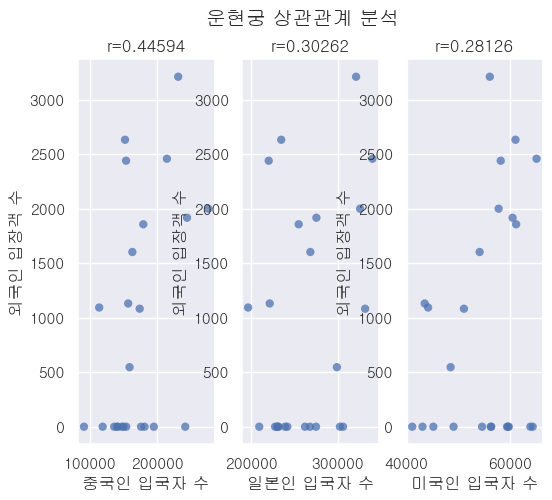

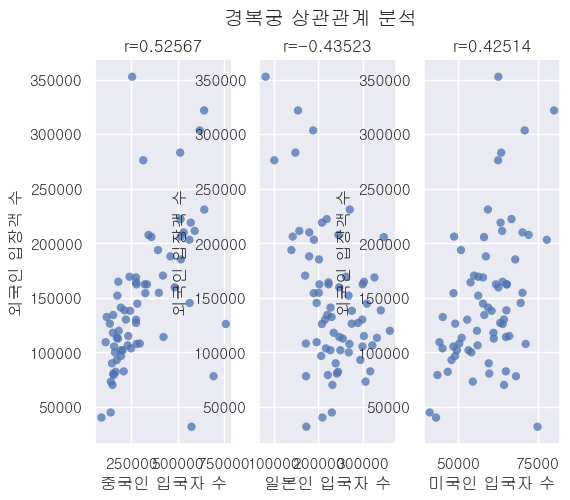

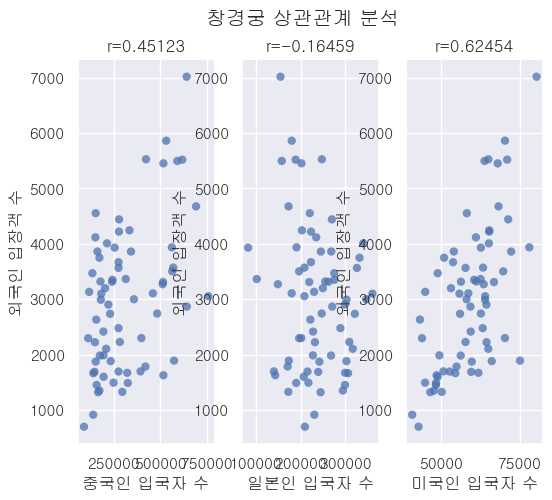

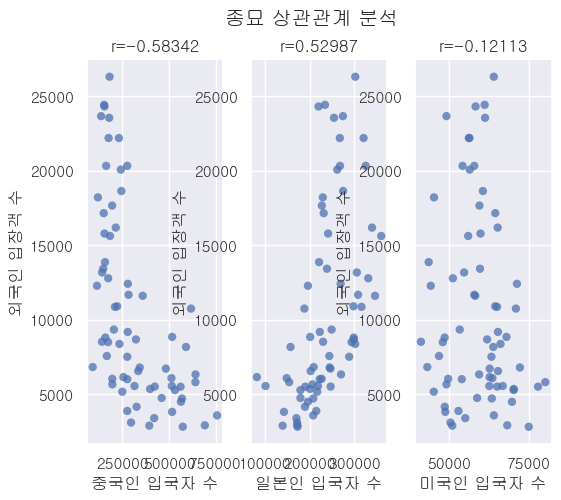

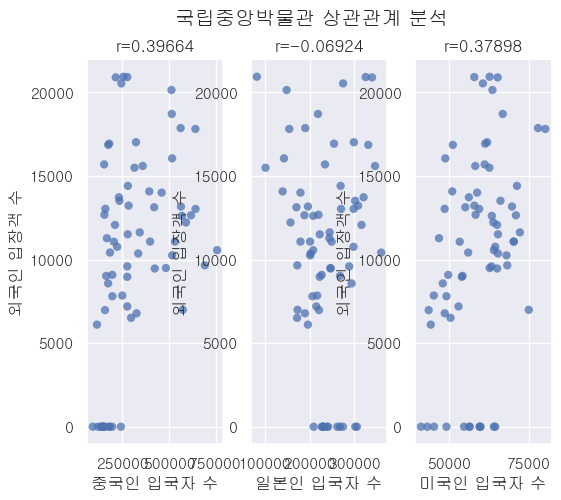

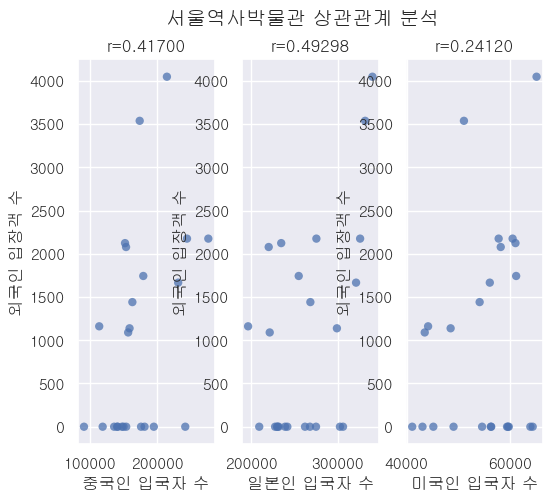

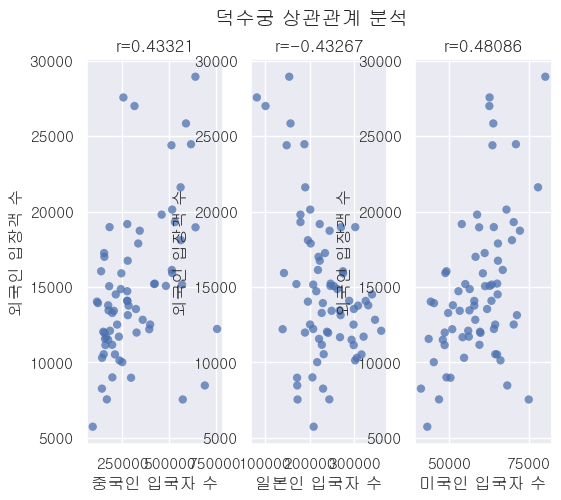

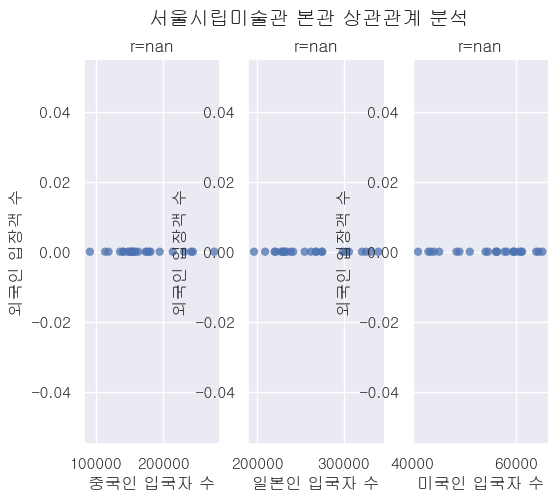

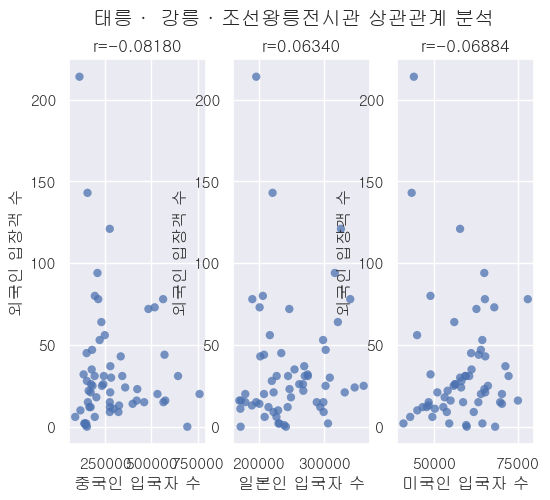

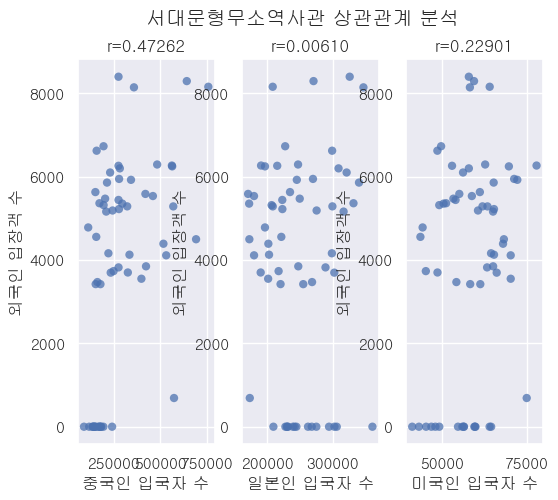

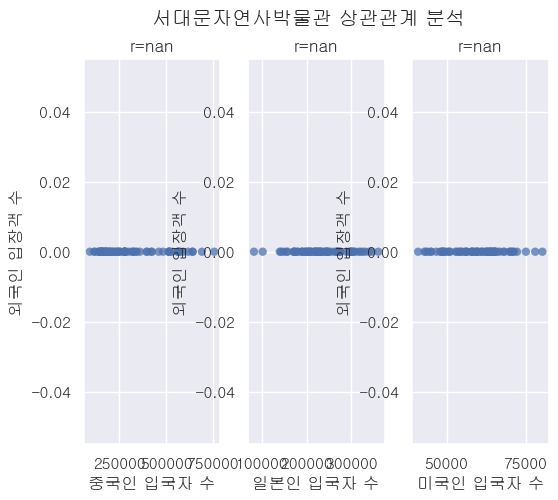

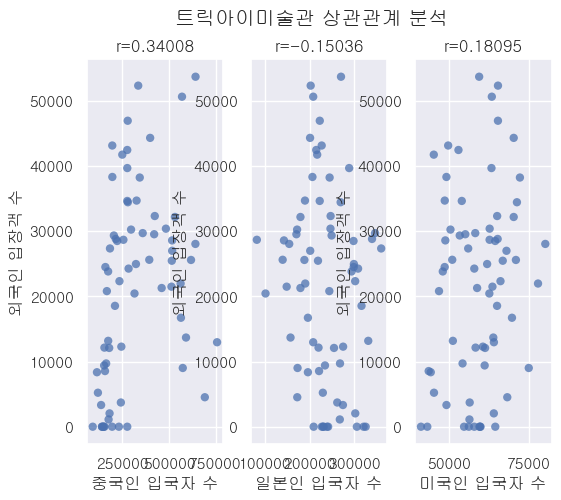

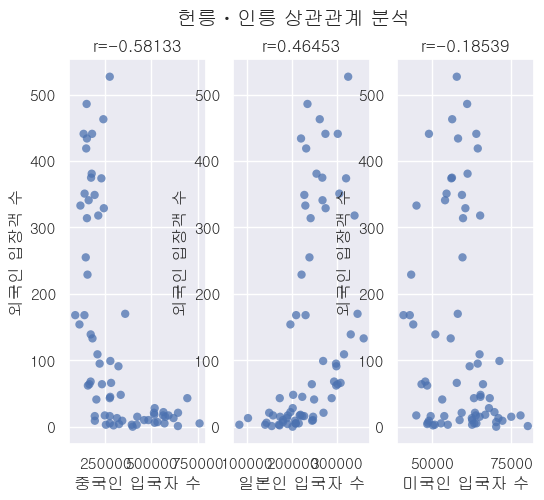

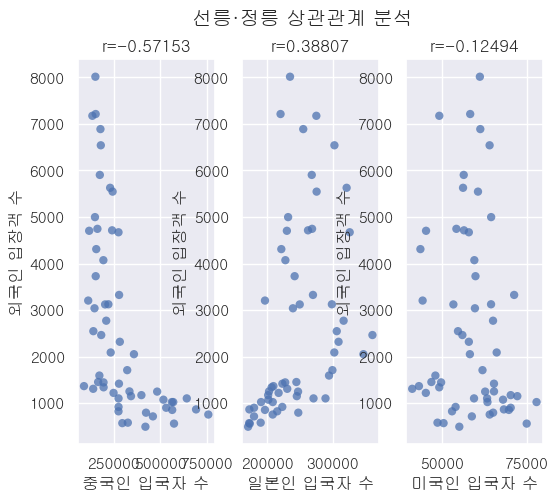

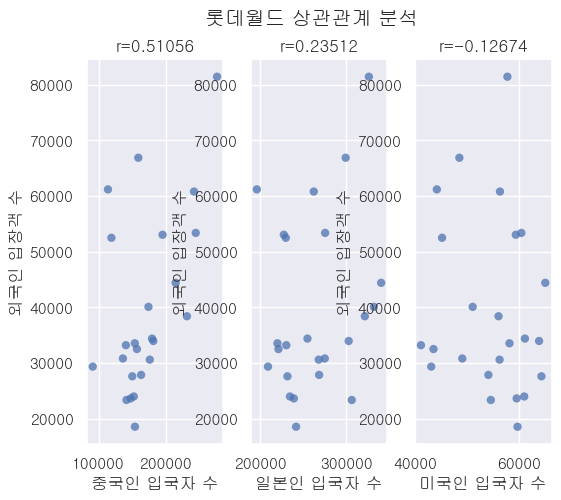

In [53]:
r_list=[]
for tourpoint in resNm:
    r_list.append(setScatterGraph(tour_table,fv_table,tourpoint))